In [1]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the best model
import pickle
with open("/content/drive/Shareddrives/1:1_Srinithi_Rajan/Model/dt_model_3sec.pkl", "rb") as file:
    dt_loaded = pickle.load(file)

In [3]:
# Load the test data
import pandas as pd
test_data = pd.read_csv('/content/drive/Shareddrives/1:1_Srinithi_Rajan/Dataset/Data/CSV files/test_scaled_3_sec.csv')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Create the classification report and a confusion matrix
y_pred = dt_loaded.predict(test_data.drop(['label'], axis=1))
y_truth = test_data['label']

# Classification report
print(classification_report(y_truth, y_pred))

              precision    recall  f1-score   support

       blues       0.71      0.72      0.71       181
   classical       0.87      0.89      0.88       218
     country       0.56      0.61      0.58       203
       disco       0.79      0.76      0.78       204
      hiphop       0.77      0.76      0.76       210
        jazz       0.77      0.64      0.70       197
       metal       0.85      0.88      0.86       191
         pop       0.88      0.85      0.86       208
      reggae       0.71      0.76      0.73       188
        rock       0.57      0.59      0.58       198

    accuracy                           0.75      1998
   macro avg       0.75      0.75      0.75      1998
weighted avg       0.75      0.75      0.75      1998



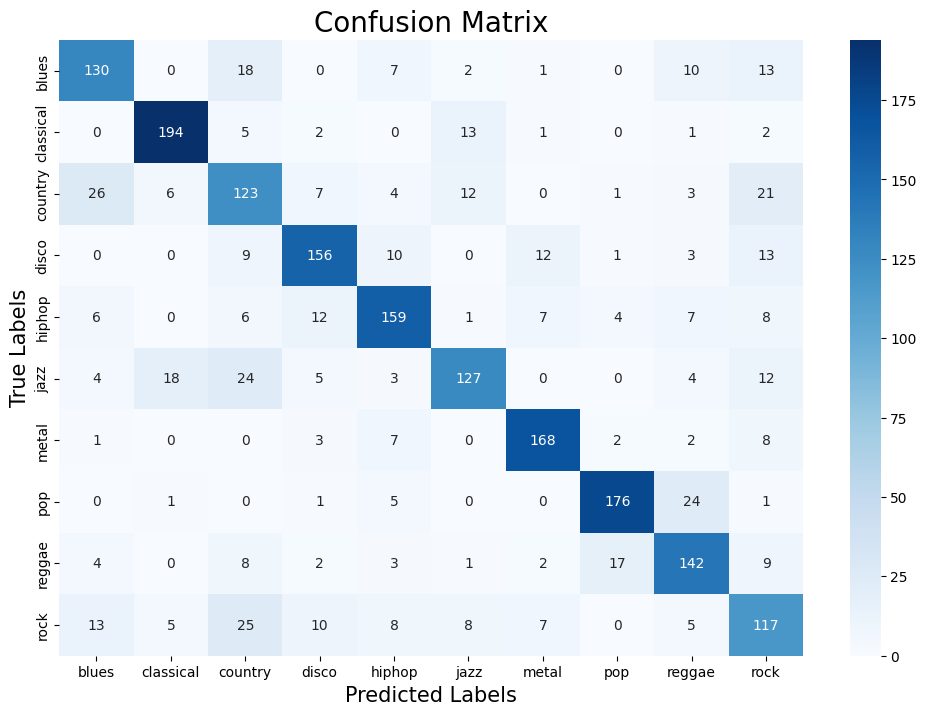

In [5]:
# Create the confusion matrix (font size flexibility)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_truth and y_pred are your true labels and predictions respectively
# Generate the confusion matrix
cm = confusion_matrix(y_truth, y_pred, labels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"], yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('True Labels', size=15)
plt.show()